In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load in data
calculated_df = pd.read_csv('calculated_behaviors_T01_0725.csv')
calculated_df.drop(columns=["mineral","i"], inplace=True) # Observed doesn't use mineral

observed_df = pd.read_csv('observed_behaviors_T01_0725.csv')


In [14]:
# Change date times into unix time stamps
observed_df['datetime'] = pd.to_datetime(observed_df['dt'], format='%Y-%m-%d %H:%M:%S')
observed_df['timestamp'] = observed_df['datetime'].astype(int)
observed_df['timestamp'] = observed_df['timestamp'].div(10**9)

# Fill in missing data
start_timestamp = observed_df.iloc[0]['timestamp']
end_timestamp = observed_df.iloc[-1]['timestamp']
delta = 1

timestamp_range = np.arange(start_timestamp,end_timestamp+delta,delta)
timestamp_range = np.round(timestamp_range,1)
# Add existing data to the full df
standardized_observed_df = pd.DataFrame(timestamp_range,columns=['timestamp'])
standardized_observed_df = pd.merge(standardized_observed_df,observed_df, how='outer', on='timestamp')
# Fill the data with ffil
standardized_observed_df.fillna(method='ffill', inplace=True)
standardized_observed_df.drop(columns=["dt", "datetime"], inplace=True)

offset = 3600*5
standardized_observed_df["timestamp"] = standardized_observed_df["timestamp"] + offset

/var/folders/38/kmbpfjjj2lj082z0tz1lz8sm0000gn/T/ipykernel_95144/2129426633.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  standardized_observed_df.fillna(method='ffill', inplace=True)


In [15]:
# All possible behaviors and the associated number
behaviors = {
    "feeding": 1,
    "drinking": 2,
    "milking": 3
}

# Create a generalized behaviors column
calculated_df["c_behaviors"] = calculated_df["feeding"]*behaviors["feeding"] + calculated_df["drinking"]*behaviors["drinking"] + calculated_df["milking"]*behaviors["milking"]
standardized_observed_df["o_behaviors"] = standardized_observed_df["feeding"]*behaviors["feeding"] + standardized_observed_df["drinking"]*behaviors["drinking"] + standardized_observed_df["milking"]*behaviors["milking"]

# Drop uneccessary columns
calculated_df.drop(columns=list(behaviors.keys()), inplace=True)
standardized_observed_df.drop(columns=list(behaviors.keys()), inplace=True)

pd.options.display.float_format = '{:.0f}'.format
# print(calculated_df.head)
# print(standardized_observed_df.head)

df = pd.merge(calculated_df, standardized_observed_df, how="outer", on="timestamp")

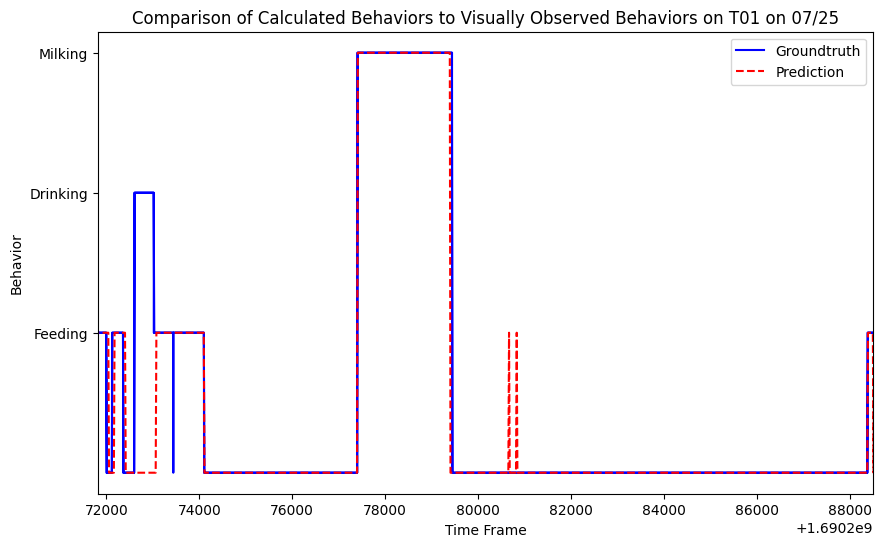

In [16]:
# Plot data
plt.figure(figsize=(10,6))
plt.plot(df["timestamp"], df["o_behaviors"], label = "Groundtruth", color='blue', linestyle='solid')
plt.plot(df["timestamp"], df["c_behaviors"], label = "Prediction", color='red', linestyle='dashed')

plt.legend()
plt.xlabel("Time Frame")
plt.ylabel("Behavior")
plt.yticks([1,2,3], ["Feeding", "Drinking", "Milking"])

plt.xlim(standardized_observed_df.iloc[0]['timestamp'], standardized_observed_df.iloc[-1]['timestamp'])

plt.title('Comparison of Calculated Behaviors to Visually Observed Behaviors on T01 on 07/25')

plt.savefig('Behaviors.png')